In [1]:
from modules.polyfit import Polyfit
from modules.paramtune import Paramtune
import jax.numpy as jnp
import json
dummy_fits = Polyfit('dummy_data/fits.npz', input_h5='dummy_data/inputdata.h5', order=3, covariance = False)
dummy_tune = Paramtune('dummy_data/fits.npz', 'dummy_data/target_data.json', 'sample_range', covariance =  False)
dummy_fits_cov = Polyfit('dummy_data/fits.npz', input_h5='dummy_data/inputdata.h5', order=3, covariance = True)
dummy_tune_cov = Paramtune('dummy_data/fits.npz', 'dummy_data/target_data.json', 'sample_range', covariance =  True)


Fitting bins: 
/func0#0, /func0#1, /func0#2, /func0#3, /func0#4, /func0#5, /func0#6, /func0#7, /func0#8, /func0#9, /func0#10, /func0#11, /func0#12, /func0#13, /func0#14, /func0#15, /func0#16, /func0#17, /func0#18, /func0#19, /func1#0, /func1#1, /func1#2, /func1#3, /func1#4, /func1#5, /func1#6, /func1#7, /func1#8, /func1#9, /func1#10, /func1#11, /func1#12, /func1#13, /func1#14, /func1#15, /func1#16, /func1#17, /func1#18, /func1#19,  inner loop done!
Calculated inital guess:  [ 1.44290955 -0.97476325]
Tuned Parameters:  [ 1.48643294 -0.99134114] , Objective =  541.727826608064 , chi2/ndf =  15.477937903087543
Covariance of Tuned Parameters:  [[8.47466639e-05 1.33087882e-05]
 [1.33087882e-05 3.84899589e-05]]
Fitting bins: 
/func0#0, /func0#1, /func0#2, /func0#3, /func0#4, /func0#5, /func0#6, /func0#7, /func0#8, /func0#9, /func0#10, /func0#11, /func0#12, /func0#13, /func0#14, /func0#15, /func0#16, /func0#17, /func0#18, /func0#19, /func1#0, /func1#1, /func1#2, /func1#3, /func1#4, /func1#5, 

'\n1x\n [[8.29169943e-05 1.40898690e-05]\n [1.40898690e-05 4.01315296e-05]]\n200x\n [[8.34164622e-05 1.41109028e-05]\n [1.41109028e-05 4.01234762e-05]]\n1000x\n [[8.35000702e-05 1.41587722e-05]\n [1.41587722e-05 4.02531556e-05]]\n\n'

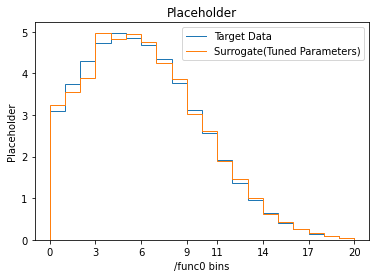

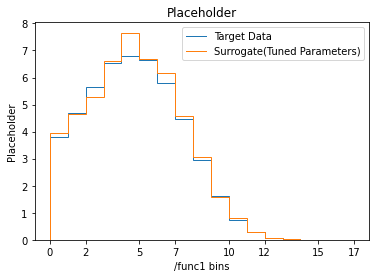

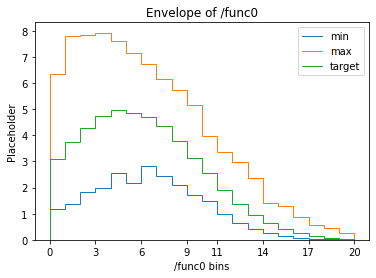

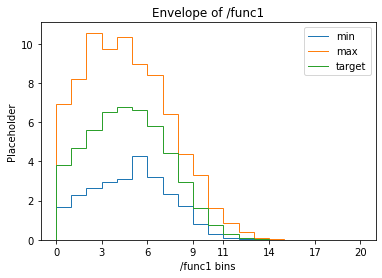

In [2]:
dummy_tune.graph_tune('/func0')
dummy_tune.graph_tune('/func1')
dummy_tune.graph_envelope_target()
"""
1x
 [[8.29169943e-05 1.40898690e-05]
 [1.40898690e-05 4.01315296e-05]]
200x
 [[8.34164622e-05 1.41109028e-05]
 [1.41109028e-05 4.01234762e-05]]
1000x
 [[8.35000702e-05 1.41587722e-05]
 [1.41587722e-05 4.02531556e-05]]

"""